<a href="https://colab.research.google.com/github/parasgupta1995/Almabetter-Capstone-project/blob/main/_telecom_churn_analysis_almabetter_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Telecom chrun and Region based Division of US state dataframe
df=pd.read_csv('/content/drive/MyDrive/Capstone project data/Python project/Telecom Churn.csv')
df2=pd.read_csv('/content/drive/MyDrive/Capstone project data/Python project/Copy of us state list regionwise - us state list regionwise.csv')

In [5]:
df=df.set_index('State').join(df2.set_index('State')).fillna('South')

In [6]:
df.reset_index(level=0, inplace=True)

In [7]:
df['State'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [8]:
df['calls minutes']=df.apply(lambda x: x['Total day minutes']+x['Total eve minutes']+x['Total night minutes']+x['Total intl minutes'],axis=1)

In [9]:
df['Total charge']=df.apply(lambda x: x['Total day charge']+x['Total eve charge']+x['Total night charge']+x['Total intl charge'],axis=1)

In [10]:
df['number of calls']=df.apply(lambda x:x['Total day calls']+x['Total eve calls']+x['Total night calls']+x['Total intl calls']+x['Customer service calls'],axis=1)

In [11]:
df.sort_values(by='State',inplace=True,ignore_index=True)

In [12]:
#dataframe of selected useful data only for calculating number of calls
Number_of_calls_dataframe=df.loc[:,['State', 'Account length', 'International plan', 'Voice mail plan','Number vmail messages', 'Total day calls', 'Total eve calls','Total night calls','Total intl calls', 'Customer service calls']]

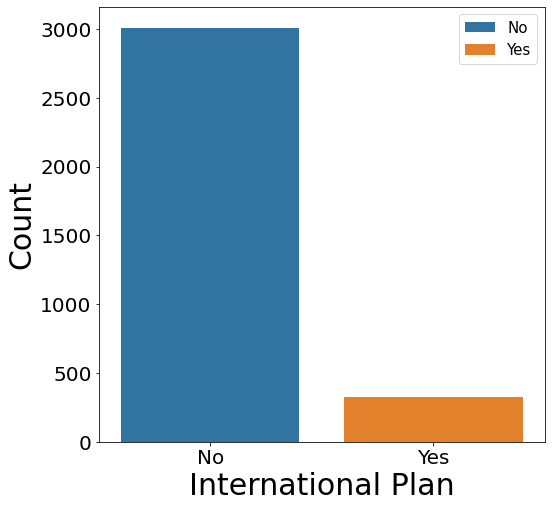

In [13]:
#People with no international plan and still making international calls can be potential customer for International plan
no_intl_plan_making_intlcalls=Number_of_calls_dataframe.groupby(by='International plan')['Account length'].count().reset_index()
plt.figure(figsize=(8,8))
sns.barplot(x='International plan',y='Account length',data=no_intl_plan_making_intlcalls,hue='International plan',dodge=False)
plt.xlabel("International Plan",size=30)
plt.xticks(size=20)
plt.ylabel("Count",size=30)
plt.yticks(size=20)
plt.legend(fontsize=15)

In [14]:
#Total number of call in each State
data_groupby_state_sum=df.groupby('State').sum()['number of calls']

In [15]:
# State with Maximum number of call 
max_call_statewise=data_groupby_state_sum.reset_index()[['number of calls','State']].max()

In [16]:
series_number_of_calls=df.groupby('State').sum().reset_index()[['State','number of calls']].sort_values(by='State').reset_index()

In [17]:
#second dataframe selected parts: 
df2.dropna(inplace=True)
data_regionwise=df2[['Region','State']]
Region_list=list(data_regionwise['Region'].unique())

In [18]:
#Number of calls regionwise dataframe
c=series_number_of_calls.set_index('State').join(df2.set_index('State'))
#one State is left which in south that fillna with south
c.fillna('South')
number_of_calls_regionwise=c.groupby(by='Region').sum().reset_index().drop('index',axis=1).sort_values(by='number of calls')

In [19]:
#Grouped Data(by="State") number of calls made based on day,evening, night, international,service support 
number_of_call_timewise=Number_of_calls_dataframe.groupby(by='State').sum()[['Total day calls', 'Total eve calls','Total night calls','Total intl calls', 'Customer service calls']].sort_values(by='State').reset_index()

In [22]:
#Call number based on Region 
calls_regionwise=number_of_call_timewise.set_index('State').join(df2.set_index('State'))

In [21]:
#Total number of day,evening,night,International,service calls Regionwise
Total_number_of_calls=calls_regionwise.groupby(by='Region').sum()
Total_number_of_calls.reset_index(inplace=True)

In [23]:
size_of=(Total_number_of_calls.shape)

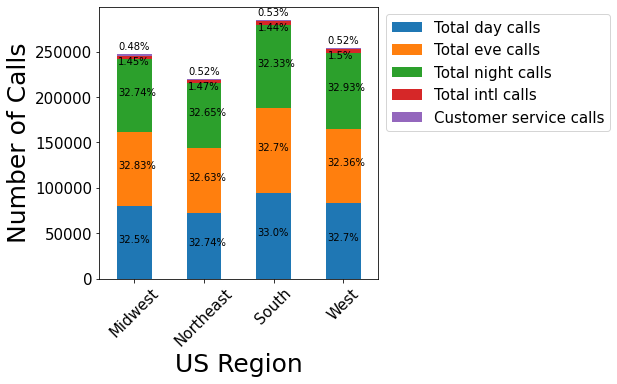

In [24]:
plt.rcParams['figure.figsize']=(5,5)
Total_number_of_calls.plot(x='Region',kind='bar',stacked=True,rot=45,fontsize=15)
plt.xlabel('US Region',fontsize=25)
plt.ylabel('Number of Calls',fontsize=25)
plt.legend(bbox_to_anchor=(1,1),fontsize=15)
column_label=['Total day calls','Total eve calls','Total night calls','Total intl calls','Customer service calls']

for i in range(size_of[0]):
  #Extracting the element at i row and all columns element except region and use sum function to add them
  calls=list(Total_number_of_calls.iloc[i,1:])
  total=int(sum(calls)) #
  y2=0
  
  for j in column_label:
    #number of calls at specified time and region
    number=int(Total_number_of_calls.loc[i,[j]])#
    if j=='Total intl calls':
      y1=y2+number-10000
    elif j=='Customer service calls':
      y1=y2+number+5000
    else:
      y1=number/2+y2
    percent=round(number/total*100,2)
    #Percentage Text in the stack bar plot
    plt.text(x=i-0.23,y=y1,s=f'{percent}%',fontsize=10)
    y2+=number
  


In [25]:
calls=list(Total_number_of_calls.iloc[0,1:])
total=int(sum(calls))
number=int(Total_number_of_calls.loc[0,['Total day calls']])   
print(type(number))
print(type(total))
percent=number/(total)
percent

<class 'int'>
<class 'int'>


0.32503867242231094

In [27]:
state_list=list(df['State'].sort_values().unique())
print(state_list)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [28]:
#Dataframe of deactivated account id
data_for_stop_id=df[df['Churn']==True][['State','Account length','Area code','Customer service calls','Churn']].groupby(by='State')


In [29]:
#list of number of stop using service statewise
list_Account_id_stop=[]
for i in state_list:
  a=list(data_for_stop_id.get_group(i)['Account length'])
  list_Account_id_stop.append(a)
dictionary_state_stop_id=dict(zip(state_list,list_Account_id_stop))
print(dictionary_state_stop_id)

{'AK': [177, 111, 126], 'AL': [25, 172, 197, 89, 60, 55, 86, 93], 'AR': [145, 98, 54, 115, 127, 113, 76, 109, 99, 118, 107], 'AZ': [113, 109, 66, 12], 'CA': [37, 105, 84, 111, 138, 151, 79, 112, 103], 'CO': [132, 92, 130, 77, 121, 159, 154, 105, 121], 'CT': [120, 119, 56, 87, 160, 93, 77, 23, 96, 115, 64, 125], 'DC': [114, 24, 60, 82, 66], 'DE': [51, 97, 138, 113, 224, 122, 67, 2, 129], 'FL': [166, 144, 55, 105, 70, 127, 100, 132], 'GA': [128, 117, 122, 132, 89, 76, 93, 44], 'HI': [105, 108, 99], 'IA': [81, 44, 40], 'ID': [92, 103, 78, 130, 116, 82, 77, 119, 193], 'IL': [68, 137, 71, 89, 78], 'IN': [129, 117, 115, 72, 122, 94, 65, 113, 68], 'KS': [47, 94, 91, 170, 84, 105, 126, 110, 92, 46, 24, 167, 110], 'KY': [113, 21, 98, 58, 39, 91, 75, 74], 'LA': [124, 150, 155, 109], 'MA': [119, 71, 17, 34, 88, 62, 136, 127, 111, 40, 98], 'MD': [62, 107, 108, 133, 111, 154, 119, 147, 93, 93, 136, 135, 116, 76, 88, 172, 61], 'ME': [23, 118, 88, 62, 56, 100, 102, 36, 131, 92, 75, 80, 97], 'MI': [10

In [30]:
#Number of Customer in each State
number_of_customer_each_state=df[['State']].value_counts().reset_index()
number_of_customer_each_state.rename(columns={0: "Number of customer"},inplace=True)

In [ ]:
#Join the dataframe to number of customer statewise
number_of_customer_each_state.set_index('State').join(df2.set_index('State'))

In [32]:
#Sort the dataframe of number of customer
number_of_customer_each_state.sort_values(by='State',inplace=True)

In [34]:
#Extraction of number chrun customer statewise list:
number_of_churn_statewise=[]
for i in list(df['State'].unique()):
  n=len(dictionary_state_stop_id.get(i))
  number_of_churn_statewise.append(n)


In [35]:
#Creating a dictionary for pandas dataframe of churn customer statewise
dataframe_churn = {"State":state_list, "Number of Churn statewise": number_of_churn_statewise}

In [36]:
#churn customer dataframe
churn_data_statewise=pd.DataFrame(dataframe_churn)

In [37]:
#dataframe of number of customer and churn customer in a State
comparision_data_for_chrun=number_of_customer_each_state.set_index('State').join(churn_data_statewise.set_index('State'))

In [39]:
#index reseting
comparision_data_for_chrun.reset_index(level=0,inplace=True)


In [40]:
# Joining comparision dataframe with df2 to get Region in the dataframe
comparision_data_for_chrun=comparision_data_for_chrun.set_index('State').join(df2.set_index('State'))

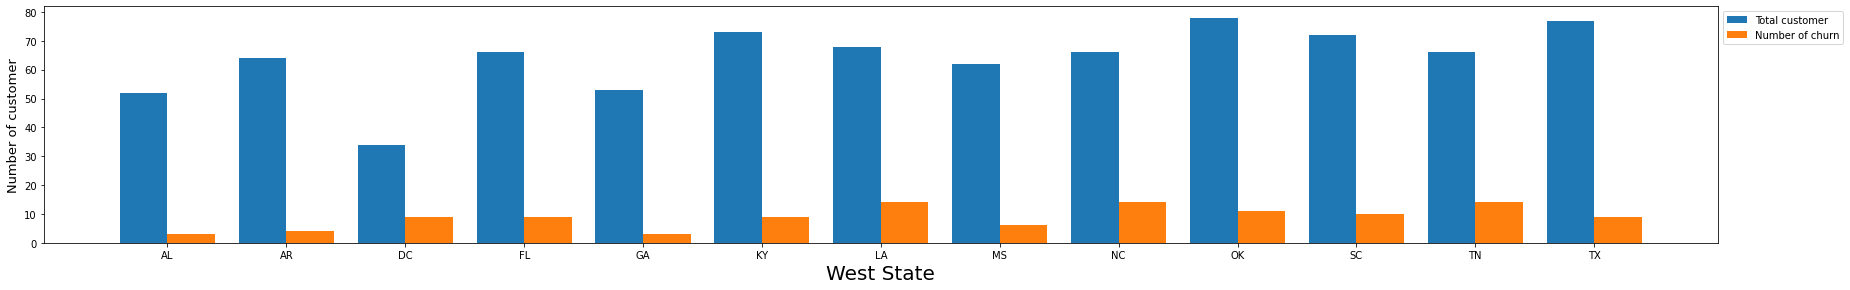

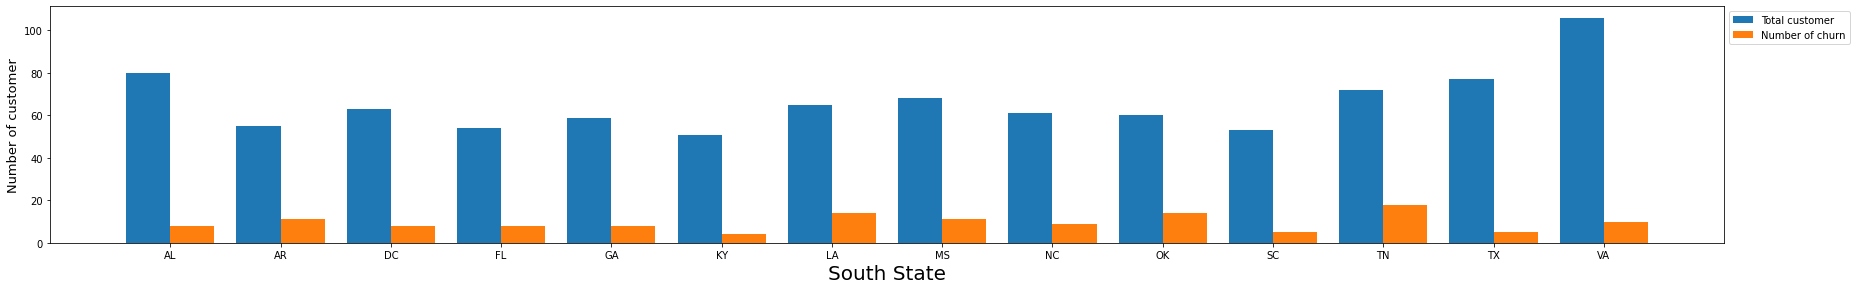

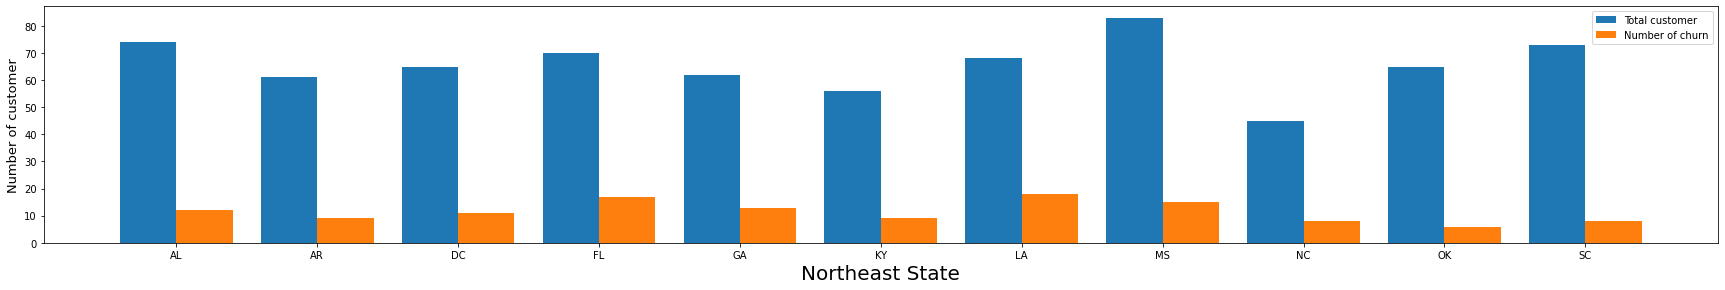

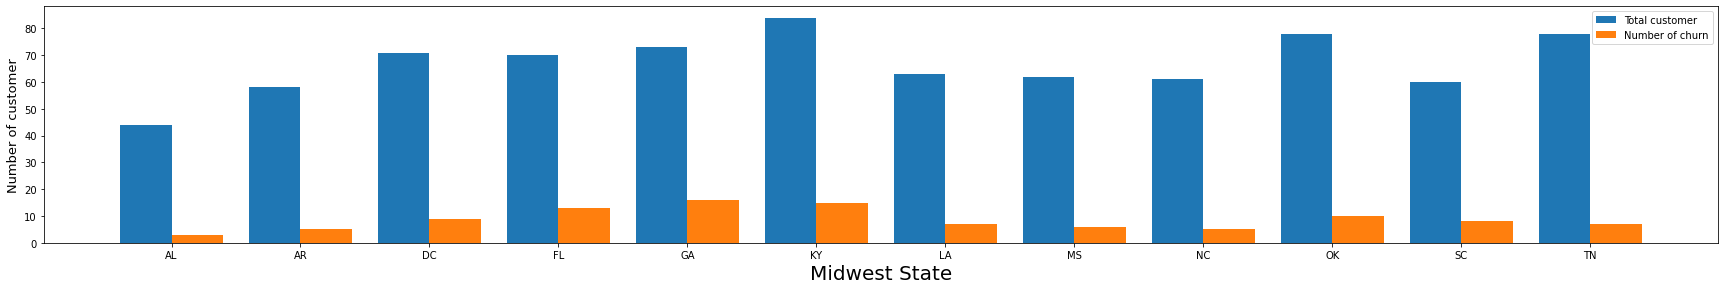

In [42]:
# Looping to plot 4 subplot and plot Total customer and number of chrun customer plot

j=1

for i in df.Region.unique():

  # a=data for x-axis
  xticks_=comparision_data_for_chrun[comparision_data_for_chrun['Region']==i].reset_index(level=0)['State']

  #To draw two bar on same tick first convert x-axis tick to number as they initially are categorical data so np.arange function 
  num_xticks=np.arange(xticks_.nunique())

  #cat-xticks is variable to replace tick by categorical data
  cat_xticks=list(df[df['Region']=='South']['State'].unique())
  width=0.4
  heigth_=(comparision_data_for_chrun[comparision_data_for_chrun['Region']==i]['Number of customer'])
  height_1=comparision_data_for_chrun[comparision_data_for_chrun['Region']==i]['Number of Churn statewise']

#Set the figure size
  plt.figure(figsize=(30,20))

#Number of subplot is 4
  plt.subplot(4,1,j)

  plt.bar(num_xticks,heigth_,width,label='Total customer')
  plt.bar(num_xticks+width,height_1,width,label='Number of churn')

  plt.xticks(num_xticks+(width/2),cat_xticks)
  plt.xlabel(f"{i} State",size=20)
  plt.ylabel("Number of customer",size=13)
  plt.legend(bbox_to_anchor=(1,1))

#Increment for the subplot plot number
  j+=1